<a href="https://colab.research.google.com/github/Dedeepya1993/PythonLearningCourse/blob/master/GACRP_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

Mounted at /content/drive


In [ ]:
cd drive/My\ Drive/GACRP/      

/content/drive/My Drive/GACRP


In [ ]:
# Importing the libraries
import pandas as pd      #  ls ----> get list of files in the present folder
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
import seaborn as sns

import json

import datetime


In [ ]:
# Normalising the columns in json format
d_col=['device','geoNetwork','totals','trafficSource']
data = pd.read_csv('train.csv', 
                     converters={column: json.loads for column in d_col},low_memory=False)
from pandas.io.json import json_normalize
for i in d_col:
  print(i)
  column_as_ai = json_normalize(data[i])
  data=pd.concat([data,column_as_ai],axis=1)

In [ ]:
data.head(3)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,visits,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,keyword,adwordsClickInfo.criteriaParameters,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,campaignCode
0,Organic Search,20160902,"{'browser': 'Chrome', 'browserVersion': 'not a...",1131660440785968503,"{'continent': 'Asia', 'subContinent': 'Western...",1131660440785968503_1472830385,Not Socially Engaged,"{'visits': '1', 'hits': '1', 'pageviews': '1',...","{'campaign': '(not set)', 'source': 'google', ...",1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,"{'browser': 'Firefox', 'browserVersion': 'not ...",377306020877927890,"{'continent': 'Oceania', 'subContinent': 'Aust...",377306020877927890_1472880147,Not Socially Engaged,"{'visits': '1', 'hits': '1', 'pageviews': '1',...","{'campaign': '(not set)', 'source': 'google', ...",1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,"{'browser': 'Chrome', 'browserVersion': 'not a...",3895546263509774583,"{'continent': 'Europe', 'subContinent': 'South...",3895546263509774583_1472865386,Not Socially Engaged,"{'visits': '1', 'hits': '1', 'pageviews': '1',...","{'campaign': '(not set)', 'source': 'google', ...",1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,"{'browser': 'UC Browser

In [ ]:
data.shape#del column_as_ai

(903653, 59)

In [ ]:
# Converting the data into a csv file
data.to_csv('train_flatten.csv',index_label=None)

In [ ]:
ls -ll # checking the files in the current path/ folder

total 3446512
-rw------- 1 root root     402417 Nov 29 08:16 'Copy of GACRP_EDA.ipynb'
-rw------- 1 root root      10428 Nov 24 18:57 'GACRP_EDA (1).ipynb'
-rw------- 1 root root      37087 Nov 30 08:42  GACRP_EDA.ipynb
-rw------- 1 root root 1503430926 Nov 24 14:53  train.csv
-rw------- 1 root root 2025346349 Nov 30 08:43  train_flatten.csv


## Loading the flatten file

In [ ]:
# Reading the flatten data from csv file
flatten_data=pd.read_csv("train_flatten.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,59) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Droping the columns that are in json format
flatten_data.drop(columns=['device','geoNetwork','totals','trafficSource'],axis=1,inplace=True)

In [ ]:
# droping the columns which have only single values and columns with more missing values(except transaction revenue)
#Uniq_col = [col for col in flatten_data.columns if flatten_data[col].nunique(dropna=False)==1 ]
flatten_data.drop(columns=['Unnamed: 0','socialEngagementType','browserVersion','browserSize','operatingSystemVersion','mobileDeviceBranding','mobileDeviceModel','mobileInputSelector','mobileDeviceInfo',  'mobileDeviceMarketingName','flashVersion','language','screenColors','screenResolution','region','metro','city','cityId','networkDomain',
                     'latitude','longitude','networkLocation','visits','adContent','adwordsClickInfo.criteriaParameters','referralPath','adwordsClickInfo.page','adwordsClickInfo.slot','adwordsClickInfo.gclId','adwordsClickInfo.adNetworkType','adwordsClickInfo.isVideoAd','adContent','campaignCode','keyword'],axis=1,inplace=True)  #32   25  'trafficSource.campaign',    'trafficSource.keyword']

#flatten_data.head(2)                 

In [ ]:
# converting date column from int to datetime  and extracting the year, month, weekday
flatten_data['date']=pd.to_datetime(flatten_data['date'],format='%Y%m%d')
flatten_data['year'] = pd.DatetimeIndex(flatten_data['date']).year
flatten_data['month'] = pd.DatetimeIndex(flatten_data['date']).month
flatten_data['weekday'] = pd.DatetimeIndex(flatten_data['date']).weekday     #.astype('category')
wd=lambda x: 1 if x <5 else 0
flatten_data['isweekday'] = flatten_data['weekday'].apply(wd)
flatten_data['month_year'] =pd.to_datetime(flatten_data['date']).dt.to_period('M')

In [ ]:
# filling nan values as 0 stating no transactions
flatten_data['transactionRevenue'].fillna(0,inplace=True)
#flatten_data['transactionRevenue'][flatten_data['transactionRevenue']>0]

# filling nan values as False
flatten_data['isTrueDirect'].fillna('NA',inplace=True)
#flatten_data['isTrueDirect'].value_counts()    # isTrueDirect column can remove as 70% of the data is missing

# filling nan values as 0
flatten_data['bounces'].fillna(0,inplace=True)

# filling nan values as 0
flatten_data['newVisits'].fillna(0,inplace=True)

In [ ]:
flatten_data.shape                                   # Shape of the dataset

(903653, 28)

In [ ]:
flatten_data.columns                               # Columns available in the dataset

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'browser', 'operatingSystem',
       'isMobile', 'deviceCategory', 'continent', 'subContinent', 'country',
       'hits', 'pageviews', 'bounces', 'newVisits', 'transactionRevenue',
       'campaign', 'source', 'medium', 'isTrueDirect', 'year', 'month',
       'weekday', 'isweekday', 'month_year'],
      dtype='object')

In [ ]:
flatten_data.info()                                    # non-null values and type  of the each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   channelGrouping     903653 non-null  object        
 1   date                903653 non-null  datetime64[ns]
 2   fullVisitorId       903653 non-null  object        
 3   sessionId           903653 non-null  object        
 4   visitId             903653 non-null  int64         
 5   visitNumber         903653 non-null  int64         
 6   visitStartTime      903653 non-null  int64         
 7   browser             903653 non-null  object        
 8   operatingSystem     903653 non-null  object        
 9   isMobile            903653 non-null  bool          
 10  deviceCategory      903653 non-null  object        
 11  continent           903653 non-null  object        
 12  subContinent        903653 non-null  object        
 13  country             903653 no

{'boxes': [<matplotlib.lines.Line2D at 0x7fde82612f28>],
 'caps': [<matplotlib.lines.Line2D at 0x7fde830c5978>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fde830c3438>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fde830c30b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fde830c5278>,
  <matplotlib.lines.Line2D at 0x7fde830c55f8>]}

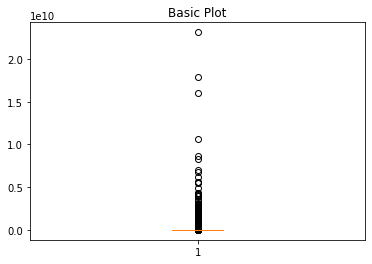

In [ ]:
# Transaction Revenue  
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(flatten_data['transactionRevenue'])                               # Description, by observing line we can infer mean, min, max are at same level i.e. 

Above we can see box plot as line representing that min value, mean & 75th percentile values are near to 0. i.e. more than 75% of transactions are Zero.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


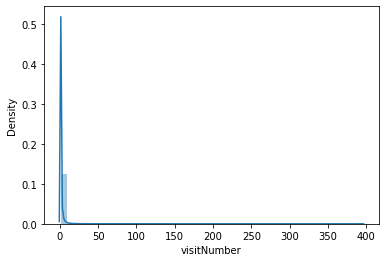

In [ ]:
# Visiting Trend
sns.distplot(flatten_data['visitNumber'])  # Most of the Customers visit once and very few are visting repeatedly

Most of the Customers visit once and very few are visting repeatedly

        date  visitNumber  transactionRevenue
0 2016-08-01         6320        6.116060e+09
1 2016-08-02         6929        1.361190e+09
2 2016-08-03         7233        0.000000e+00
3 2016-08-04         6456        1.182890e+09
4 2016-08-05         5686        5.594260e+09


Text(0, 0.5, 'TransactionRevenue')

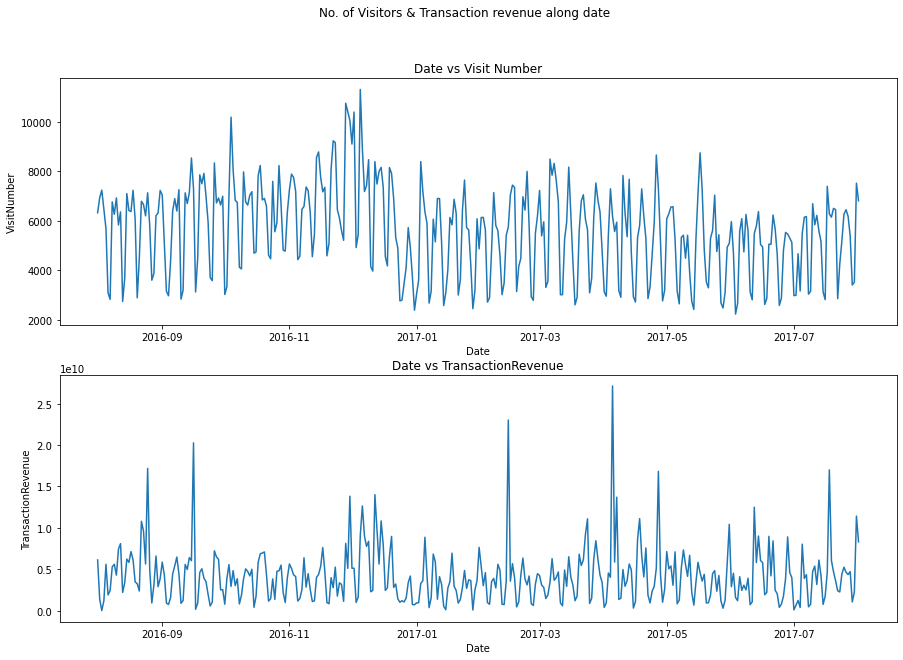

In [ ]:
# Trend Analysis (Visits & Revenue Vs Date)
datevt=flatten_data[['visitNumber','transactionRevenue']].groupby(by=flatten_data['date']).sum()
datevt=datevt.reset_index()
print(datevt.head(5))

fig, (ax1, ax2) = plt.subplots(2,figsize=(15,10))
fig.suptitle('No. of Visitors & Transaction revenue along date')
ax1.plot(datevt['date'],datevt['visitNumber'])
ax1.set_title('Date vs Visit Number')
ax1.set_xlabel('Date')
ax1.set_ylabel('VisitNumber')
ax2.plot(datevt['date'],datevt['transactionRevenue'])
ax2.set_title('Date vs TransactionRevenue')
ax2.set_xlabel('Date')
ax2.set_ylabel('TransactionRevenue')

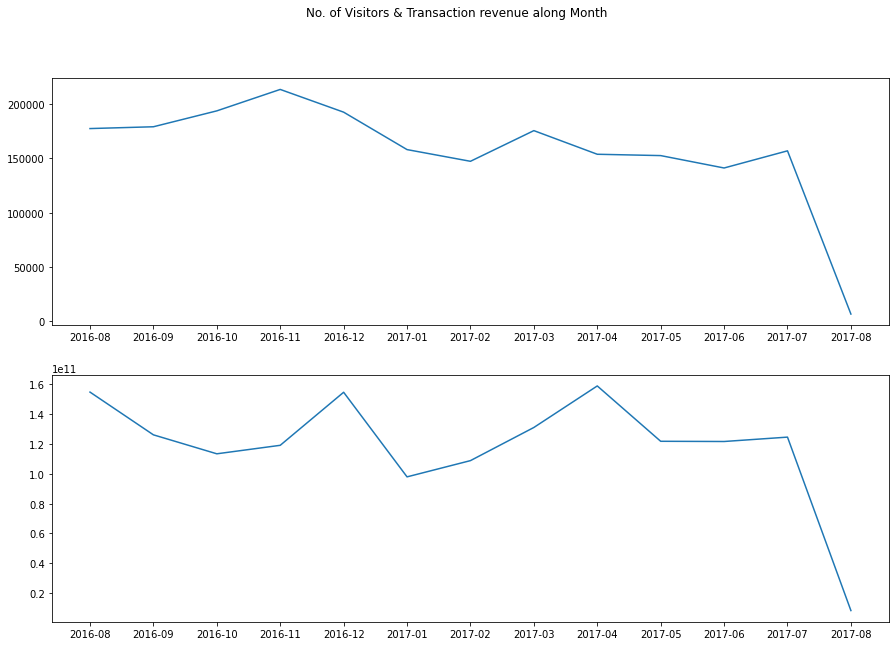

In [ ]:
period_vt=flatten_data[['visitNumber','transactionRevenue']].groupby(by=flatten_data['month_year']).sum()
period_vt=period_vt.reset_index()
#print(period_vt.head(2))

fig, (ax1, ax2) = plt.subplots(2,figsize=(15,10))
fig.suptitle('No. of Visitors & Transaction revenue along Month')
ax1.plot(period_vt['month_year'].astype(str),period_vt['visitNumber'])
ax2.plot(period_vt['month_year'].astype(str),period_vt['transactionRevenue'])

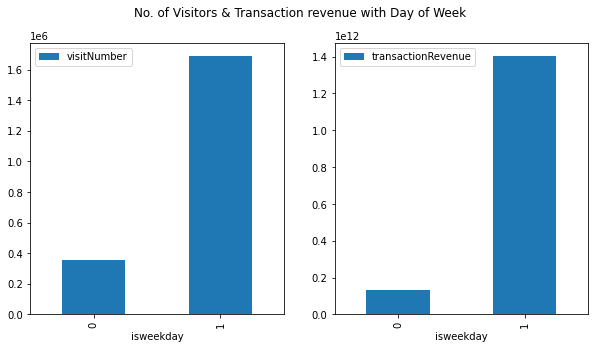

In [ ]:
weeky=flatten_data[['visitNumber','transactionRevenue']].groupby(flatten_data['isweekday']).sum().reset_index()
fig, axes = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('No. of Visitors & Transaction revenue with Day of Week')
weeky.plot.bar(x='isweekday', y='visitNumber', ax=axes[0])
weeky.plot.bar(x='isweekday', y='transactionRevenue', ax=axes[1])
plt.show()

Most visits and transactions are happened on weekdays and very few on weekends

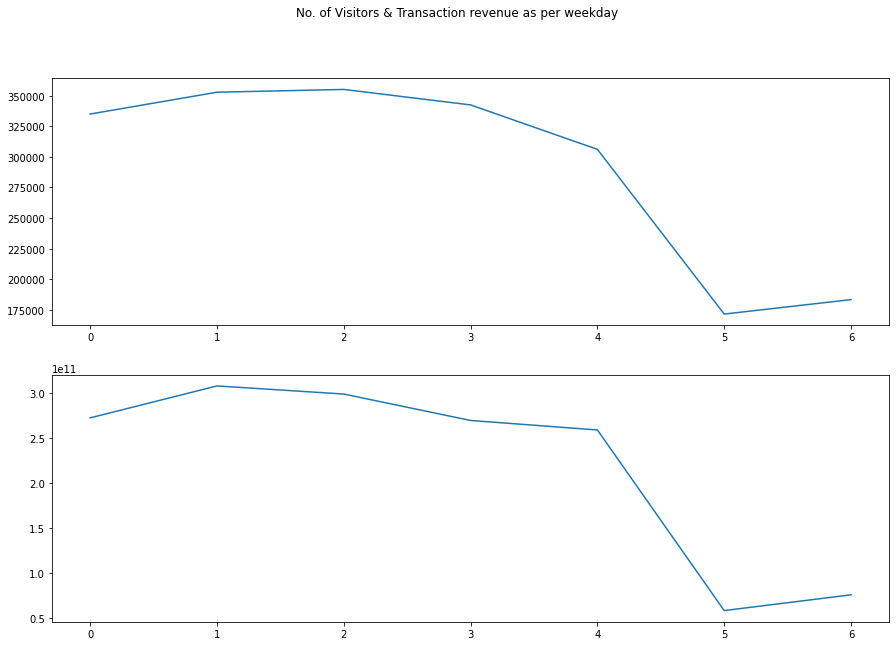

In [ ]:
weekdayvt=flatten_data[['visitNumber','transactionRevenue']].groupby(by=flatten_data['weekday']).sum()
weekdayvt=weekdayvt.reset_index()
#print(weekdayvt)

fig, (ax1, ax2) = plt.subplots(2,figsize=(15,10))
fig.suptitle('No. of Visitors & Transaction revenue as per weekday')
ax1.plot(weekdayvt['weekday'],weekdayvt['visitNumber'])
ax2.plot(weekdayvt['weekday'],weekdayvt['transactionRevenue'])

Weekdays have equal amount of visitors and transactions

In [ ]:
 # source,  country,browser
flatten_data1=flatten_data.copy(deep=True)

b=['Chrome','Safari','Firefox','Internet Explorer','Edge','Android Webview','Safari (in-app)','Opera Mini','Opera','UC Browser','United States','India','United Kingdom','Canada','Vietnam','Turkey','Thailand','Germany','Brazil','Japan','France','Mexico','Taiwan','Australia','Russia','google',' youtube.com','(direct)','mall.googleplex.com','Partners','analytics.google.com','dfa','google.com','m.facebook.com','baidu','sites.google.com','facebook.com','siliconvalley.about.com','reddit.com']
def col_others(x):
  for i in ['browser','country','source']:
    if x[i] not in b:
      x[i]='others'
  return x

flatten_data1=flatten_data1.apply(col_others,axis=1)
    

In [ ]:
x_col=['channelGrouping',  'browser', 'operatingSystem',  'isMobile', 'deviceCategory', 'continent',  'country', 'bounces', 'newVisits',   'campaign', 'source', 'medium',  'isTrueDirect']
fig,axes=plt.subplots(13,2, figsize=(25,65))
plt.subplots_adjust( top=0.9,bottom=0.1,hspace=0.5)
for r,i in enumerate(x_col):
  columngrouping=flatten_data1[['visitNumber','transactionRevenue']].groupby(flatten_data1[i]).sum().reset_index()
  columngrouping.sort_values(by='visitNumber').plot.bar(x=i,y='visitNumber', ax=axes[r][0],label= i + ' vs Visit Number')
  columngrouping.sort_values(by='transactionRevenue').plot.bar(x=i,y='transactionRevenue', ax=axes[r][1],label= i + ' vs Transaction Revenue')
  
  
SMALL_SIZE = 18
MEDIUM_SIZE = 22
#BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.show()

From the above plots, we can see that top four to five categories in each feature are having higher visitors and also generating most of the revenue.

Also we can observe that, Most visits and revenue transactions are  happening through desktop than mobile and other devices.

If we classify the visit numbers and revenue transactions geographically,  then we have more number from American country, Asian and European countries. 

In [ ]:
month_yearfv=flatten_data['fullVisitorId'].groupby(by=flatten_data['month_year']).nunique()
month_yearfv=month_yearfv.reset_index()
month_yearfv   #table tells us the unique no. of visitors per month
#np.sum(month_yearfv['fullVisitorId'].values)


Above table tells us the unique no. of visitors per month

In [ ]:
start_date=flatten_data['month_year'].groupby(by=flatten_data['fullVisitorId']).min().reset_index() # 
print("Month-Year of each Visitor's First visit: "+'\n\n'+str(start_date))
print('\n')
uniq_start=start_date.groupby(by='month_year').nunique()
print('New Visitors visited in each month: '+'\n\n'+str(uniq_start))

Month-Year of each Visitor's First visit: 

              fullVisitorId month_year
0             4823595352351    2016-11
1             5103959234087    2016-08
2            10278554503158    2016-10
3            20424342248747    2016-11
4            26722803385797    2017-06
...                     ...        ...
723798  9999470222842102470    2016-09
723799  9999493741609373843    2016-10
723800  9999607385222235728    2016-09
723801  9999761280717362235    2016-09
723802  9999963186378918199    2017-03

[723803 rows x 2 columns]


New Visitors visited in each month: 

            fullVisitorId
month_year               
2016-08             62300
2016-09             58037
2016-10             82758
2016-11             95979
2016-12             60737
2017-01             50154
2017-02             48746
2017-03             55474
2017-04             53305
2017-05             49559
2017-06             49007
2017-07             55488
2017-08              2259


In [ ]:
last_date=flatten_data['month_year'].groupby(by=flatten_data['fullVisitorId']).max().reset_index()
print("Month-Year of each Visitor's Last visit: "+'\n\n'+str(last_date))

Month-Year of each Visitor's Last visit: 

              fullVisitorId month_year
0             4823595352351    2016-11
1             5103959234087    2016-08
2            10278554503158    2016-10
3            20424342248747    2016-11
4            26722803385797    2017-06
...                     ...        ...
723798  9999470222842102470    2016-09
723799  9999493741609373843    2016-10
723800  9999607385222235728    2016-09
723801  9999761280717362235    2016-09
723802  9999963186378918199    2017-03

[723803 rows x 2 columns]


No. of days that each Visitor visited the store: 
              fullVisitorId  date
0             4823595352351     1
1             5103959234087     1
2            10278554503158     1
3            20424342248747     1
4            26722803385797     1
...                     ...   ...
723798  9999470222842102470     1
723799  9999493741609373843     1
723800  9999607385222235728     1
723801  9999761280717362235     1
723802  9999963186378918199     1

[723803 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


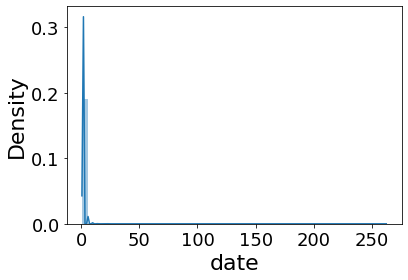

In [ ]:
Nvisits_id=flatten_data['date'].groupby(by=flatten_data['fullVisitorId']).count()
print("No. of days that each Visitor visited the store: "+'\n'+str(Nvisits_id.reset_index()))
sns.distplot(Nvisits_id)

To know, how many months does each visitor visited: 
              fullVisitorId  month_year
0             4823595352351           1
1             5103959234087           1
2            10278554503158           1
3            20424342248747           1
4            26722803385797           1
...                     ...         ...
723798  9999470222842102470           1
723799  9999493741609373843           1
723800  9999607385222235728           1
723801  9999761280717362235           1
723802  9999963186378918199           1

[723803 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


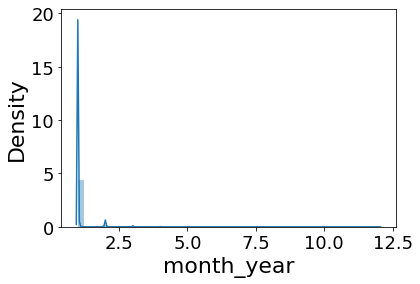

In [ ]:
Id_visits_M=flatten_data['month_year'].groupby(by=flatten_data['fullVisitorId']).nunique()
print("To know, how many months does each visitor visited: "+'\n'+str(Id_visits_M.reset_index()))
sns.distplot(Id_visits_M)
#Id_visits_M[Id_visits_M['month_year']>1]

As most of the visitors had visited only once, we can see only single month have peak value

In [ ]:
#Id_visits_M.reset_index()['month_year'].value_counts()                               #  No. of months each visitor visited(695976 visited only 1 month, 22780 visited 2 months)

1     695976
2      22780
3       3523
4        884
5        325
6        134
7         76
8         43
9         34
10        20
12         5
11         3
Name: month_year, dtype: int64

In [ ]:
#Label encoding